In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
(X_train, Y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Z = X_train[Y_train == 0]

In [8]:
Z.shape

(5923, 28, 28)

In [9]:
z = Z.reshape(-1, 784)

In [10]:
z.shape

(5923, 784)

In [11]:
mu = np.mean(z, axis = 0)

In [12]:
C = np.cov(z.T)

In [13]:
eig_vals, eig_vecs = np.linalg.eig(C)

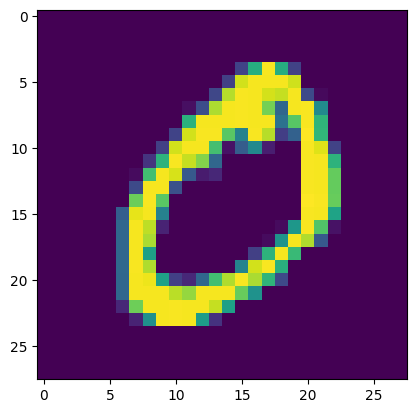

In [14]:
plt.imshow(Z[0])

In [74]:
x = z[0]

In [75]:
c1 = np.dot((x - mu), eig_vecs[0])

In [76]:
x_hat = mu + c1*eig_vecs[0]

In [77]:
x_hat.shape

(784,)

In [78]:
x_hat = x_hat.astype(np.float32)

<ipython-input-78-86e64ea02c35>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  x_hat = x_hat.astype(np.float32)


In [79]:
x_hat.shape

(784,)

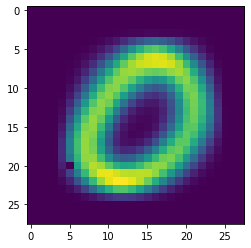

In [80]:
plt.imshow(x_hat.reshape((28, 28)))

In [81]:
eigenvectors = eig_vecs[0:5]
new_x_hat = np.zeros(784)

for e in eigenvectors:
  c = np.dot((x-mu), e)
  new_x_hat += (mu + c * e).astype(np.float32)

<ipython-input-81-b0bb694df924>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  new_x_hat += (mu + c * e).astype(np.float32)


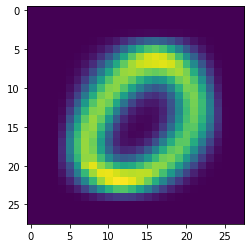

In [82]:
plt.imshow(new_x_hat.reshape((28, 28)))

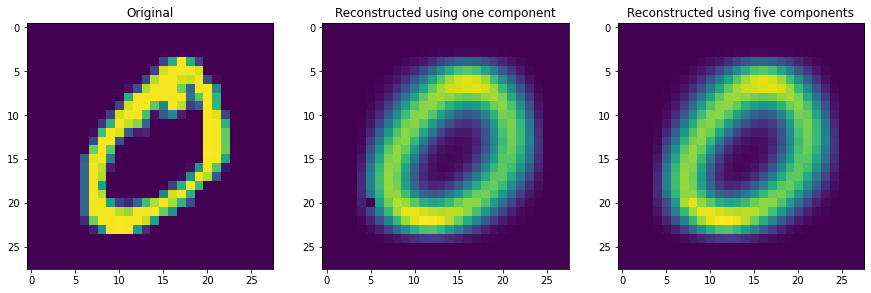

In [83]:
fig = plt.figure(figsize = (15, 5))
fig.add_subplot(1, 3, 1)
plt.title('Original')
plt.imshow(x.reshape((28, 28)))
fig.add_subplot(1, 3, 2)
plt.title('Reconstructed using one component')
plt.imshow(x_hat.reshape((28, 28)))
fig.add_subplot(1, 3, 3)
plt.title('Reconstructed using five components')
plt.imshow(new_x_hat.reshape((28, 28)))
plt.show()